In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,NaN,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,NaN,-0.03757,0.87403,-0.16243


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
float64		column 3	6
float64		column 4	3
float64		column 5	3
float64		column 6	0
float64		column 7	3
float64		column 8	0
float64		column 9	0
float64		column 10	6
float64		column 11	0
float64		column 12	3
float64		column 13	0
float64		column 14	3
float64		column 15	3
float64		column 16	0
float64		column 17	0
float64		column 18	3
float64		column 19	6
float64		column 20	3
float64		column 21	3
float64		column 22	0
float64		column 23	3
float64		column 24	3
float64		column 25	3
float64		column 26	3
float64		column 27	6
float64		column 28	0
float64		column 29	6
float64		column 30	3
float64		column 31	3
float64		column 32	9
float64		column 33	9
float64		column 34	0


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,348.0,345.000000,348.000000,348.000000,351.000000,348.000000,351.000000,351.000000,345.000000,...,348.000000,348.000000,345.000000,351.000000,345.000000,348.000000,348.000000,342.000000,342.000000,351.000000
mean,0.891738,0.0,0.638636,0.045364,0.597905,0.115889,0.548280,0.119360,0.511848,0.179490,...,0.402021,-0.067475,0.556307,-0.069538,0.373280,-0.028774,0.352793,-0.009521,0.342871,0.014480
std,0.311155,0.0,0.500230,0.441680,0.520974,0.460810,0.493440,0.520750,0.507066,0.482908,...,0.573458,0.505971,0.505696,0.550025,0.574237,0.508035,0.567338,0.505479,0.523198,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.470900,-0.064083,0.410318,-0.024795,0.204355,-0.054840,0.087110,-0.046220,...,0.000000,-0.308335,0.333330,-0.443165,0.000000,-0.236687,0.000000,-0.239347,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.015340,0.806830,0.022800,0.728000,0.014710,0.684210,0.018290,...,0.555330,-0.014915,0.716980,-0.017690,0.489040,0.000000,0.442090,0.000000,0.407060,0.000000
75%,1.000000,0.0,1.000000,0.193642,1.000000,0.334655,0.966020,0.445675,0.953240,0.530200,...,0.909400,0.155608,1.000000,0.153535,0.877010,0.153197,0.852455,0.196738,0.802882,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

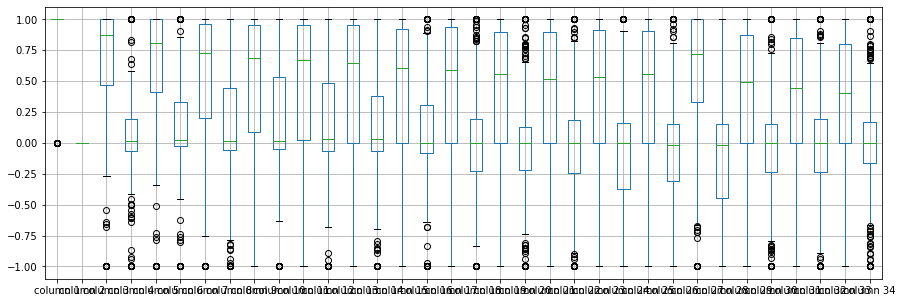

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.638636
column 4     0.045364
column 5     0.597905
column 6     0.115889
column 7     0.548280
column 8     0.119360
column 9     0.511848
column 10    0.179490
column 11    0.476183
column 12    0.154447
column 13    0.400801
column 14    0.098971
column 15    0.347570
column 16    0.071132
column 17    0.381949
column 18   -0.005536
column 19    0.355092
column 20   -0.022051
column 21    0.342472
column 22    0.008296
column 23    0.365374
column 24   -0.060544
column 25    0.402021
column 26   -0.067475
column 27    0.556307
column 28   -0.069538
column 29    0.373280
column 30   -0.028774
column 31    0.352793
column 32   -0.009521
column 33    0.342871
column 34    0.014480
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.311864,-0.005769,0.163471,0.127606,0.232452,0.027079,0.189242,-0.022874,...,-0.002039,0.138445,-0.199124,-0.010725,0.132153,-0.122586,0.169239,-0.090495,0.188634,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.311864,NaN,1.000000,0.138154,0.487195,0.030477,0.451593,0.013109,0.476828,0.062928,...,0.301599,-0.090530,0.084362,0.126373,0.343201,0.056840,0.246766,-0.004277,0.264100,0.002433
column 4,-0.005769,NaN,0.138154,1.000000,0.000265,-0.193799,-0.054019,0.253561,-0.303408,0.243859,...,-0.107286,-0.239860,-0.038173,-0.009898,-0.036112,0.339753,-0.187458,-0.121162,-0.146956,0.031691
column 5,0.163471,NaN,0.487195,0.000265,1.000000,0.035429,0.594597,-0.032665,0.447398,-0.046026,...,0.234965,-0.046581,0.149099,0.182060,0.250003,0.055362,0.380644,0.016803,0.388425,-0.094157
column 6,0.127606,NaN,0.030477,-0.193799,0.035429,1.000000,-0.012878,0.274747,-0.120712,0.186875,...,-0.176454,0.033447,-0.168216,-0.068775,-0.027842,-0.155449,-0.093266,0.284942,0.021528,0.185215
column 7,0.232452,NaN,0.451593,-0.054019,0.594597,-0.012878,1.000000,-0.153577,0.458608,-0.103907,...,0.276622,0.085087,0.103494,0.103518,0.295698,-0.015376,0.420636,-0.013749,0.536482,-0.070351
column 8,0.027079,NaN,0.013109,0.253561,-0.032665,0.274747,-0.153577,1.000000,-0.336013,0.383001,...,-0.179445,-0.132620,-0.246458,0.072373,-0.133461,0.082413,-0.155185,0.162591,-0.202578,0.360610
column 9,0.189242,NaN,0.476828,-0.303408,0.447398,-0.120712,0.458608,-0.336013,1.000000,-0.249497,...,0.363903,0.089338,0.177541,0.146817,0.325741,-0.038004,0.309032,-0.047439,0.350361,-0.095597
column 10,-0.022874,NaN,0.062928,0.243859,-0.046026,0.186875,-0.103907,0.383001,-0.249497,1.000000,...,-0.251402,-0.029124,-0.247537,0.073708,-0.124587,0.014683,-0.168164,-0.029265,-0.234657,0.095942


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [34,34+32,34+32+32,34+32+32+32,34+32+32+32+32,34+32+32+32,34+32+32,34+32,34], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised



In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Ionosphere_NL_1(imp).xlsx", index=False, header=False)